In [5]:
import time
import datetime

In [4]:
# Get the current timestamp
timestamp = time.time()

# Convert timestamp to datetime object
dt_object = datetime.datetime.fromtimestamp(timestamp)

# Format datetime object as a string
formatted_string = dt_object.strftime("%Y-%m-%d %H:%M:%S")

print(formatted_string)

NameError: name 'time' is not defined

In [5]:
import os

def count_files_in_folder(folder_path):
    # List all files in the folder
    files = os.listdir(folder_path)
    # Count the number of files
    num_files = len(files)
    return num_files

# Example usage:
folder_path = "C:/Users/tiston/code/ludwig_code/raw_data"  # Replace with your folder path
num_files = count_files_in_folder(folder_path)
print("Number of files in the folder:", num_files)


Number of files in the folder: 2058


In [3]:
import csv

def count_csv_rows(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        row_count = sum(1 for row in csvreader)
    return row_count

# Example usage:
filename = "C:/Users/tiston/code/coordinates.csv"  # Replace with your CSV file path
num_rows = count_csv_rows(filename)
print("Number of rows in the CSV:", num_rows)

Number of rows in the CSV: 17162


In [7]:
def testing():
    global x
    x = "dab"

testing()
x

'dab'

In [13]:
import time

timestamp = time.time()
time.sleep(3)
if time.time() - timestamp < 2:
    print("Too fast measurement, sleeping")
    time.sleep(2)

In [10]:
31.9 / 2058 * 17162

266.0193391642371

In [11]:
specifications = {
    'X': (-100, -100, 10),  # (min, max, step)
    'Y': (0.0, 0.0, 1),      # (min, max, step)
    'Z': (-100, 0, 10)       # (min, max, step)
}

specifications.get('X', (0, 0, 1))

(-100, -100, 10)

In [13]:
def convert_word_to_number(byte1, byte2, byte_order='MSBFirst'):
    if byte_order == 'MSBFirst':
        msb = byte1
        lsb = byte2
    else:
        msb = byte2
        lsb = byte1

    # Combine bytes to form the signed 16-bit integer
    number = (msb << 8) | lsb

    # Check if the number is negative and perform sign extension
    if number & 0x8000:
        number = -((number ^ 0xFFFF) + 1)

    return number

# Example usage:
byte1 = 0x7A  # Example MSB
byte2 = 0x12  # Example LSB
byte_order = 'MSBFirst'  # or 'LSBFirst'

number = convert_word_to_number(byte1, byte2, byte_order)
print("Converted number:", number)

Converted number: 31250


In [18]:
byte_data = [36, -34, 35, -42, 36, -58, 38, 1, 37, 74, 37, 29, 36, -35, 36, -72, 35, -75, 37, 29, 37, 76, 36, -46, 35, -4, 36, -75, 37, 99, 35, 112, 36, 47, 34, -4, 36, 105, 36, 125, 35, 53, 36, 71, 37, 92, 36, 80, 36, -100, 35, -126, 36, 36, 36, 121, 37, 22, 36]

In [22]:
def convert_bytes_to_signed_int(byte1, byte2):
    # Combine bytes to form the signed 16-bit integer
    number = (byte1 << 8) | byte2

    # Check if the number is negative and perform sign extension
    if number & 0x8000:
        number = -((number ^ 0xFFFF) + 1)

    return number

# Convert bytes to signed integers (pairs of bytes)
signed_integers = [convert_bytes_to_signed_int(byte_data[i], byte_data[i+1]) for i in range(0, len(byte_data) - 1, 2)]

# Print the converted signed integers
for number in signed_integers:
    print(number)

65502
65494
65478
9729
9546
9501
65501
65464
65461
9501
9548
65490
65532
65461
9571
9072
9263
65532
9321
9341
9013
9287
9564
9296
65436
65410
9252
9337
9494


Agilent Technologies,54832B,MY41000408,A.03.70,0



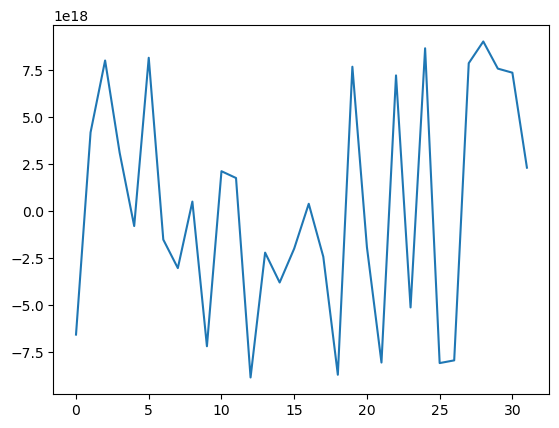

In [88]:
import pyvisa    
import time
import matplotlib.pyplot as plt

rm = pyvisa.ResourceManager()
#print(rm.list_resources())

#Set up oscilloscope
scope = rm.open_resource('TCPIP::10.77.76.3::INSTR')
time.sleep(2)
print(scope.query('*IDN?'))

scope.write(":WAVeform:FORMat ASCii")
#scope.write(":WAVeform:FORMat WORD")  # Set waveform data format to ASCII
scope.write(":WAVeform:POINts MAX")    # Set number of waveform points to acquire

scope.write(":WAVeform:SOURce CHANnel2")  # Select Channel as the source
time.sleep(2)
waveform_data_ascii = scope.query(":WAVeform:DATA?")

scope.write(":WAVeform:FORMat BINary")
waveform_data_binary = scope.query_binary_values(":WAVeform:DATA?", datatype="q", is_big_endian=False)
#plt.plot(waveform_data_ascii[::10000])
plt.plot(waveform_data_binary[::10000])
plt.show()

1252275
1252275
-1938
25437
3.52595475


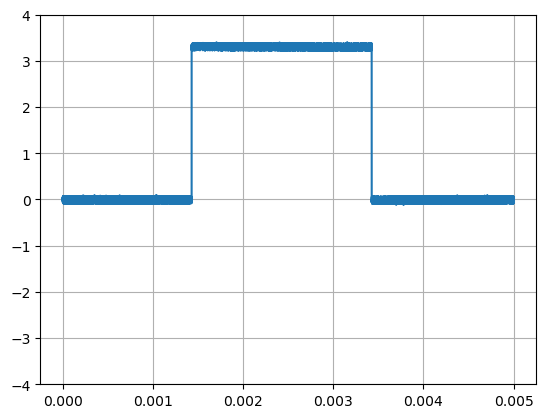

In [98]:
scope.write(":WAVeform:FORMat WORd")
waveform_data_binary = scope.query_binary_values(":WAVeform:DATA?", datatype="h", is_big_endian=True)
y_range = scope.query(":WAVeform:YRANge?")
x_range = scope.query(":WAVeform:XRANge?")
y_inc = float(scope.query(":WAVeform:YINCrement?"))
y_org = float(scope.query(":WAVeform:YORigin?"))

ascii = waveform_data_ascii.split(",")
converted_16int = [value*y_inc + y_org for value in waveform_data_binary]



time = np.linspace(0, float(x_range), len(converted_16int))
plt.plot(time, converted_16int)
plt.grid()
plt.ylim((-float(y_range)/2, float(y_range)/2))
#plt.plot(ascii)
waveform_data_binary[0]
print(len(ascii))
print(len(waveform_data_binary))
print(min(waveform_data_binary))
print(max(waveform_data_binary))
conv = 32736 + 30472
print(max(converted_16int) - min(converted_16int))

In [97]:
y_inc
y_org

0.129833

In [67]:
import numpy as np

In [82]:
float(y_range)

1.6

In [100]:
import time

time.sleep(0)

In [7]:
import pyvisa    
import time
import matplotlib.pyplot as plt

rm = pyvisa.ResourceManager()
#print(rm.list_resources())

#Set up oscilloscope
scope = rm.open_resource('TCPIP::10.77.76.3::INSTR')
time.sleep(2)
print(scope.query('*IDN?'))

trig1 = scope.query("TER?")
trig2 = scope.query("TER?")
time.sleep(2)
trig3 = scope.query("TER?")

Agilent Technologies,54832B,MY41000408,A.03.70,0



In [8]:
print(trig1)
print(trig2)
print(trig3)

+1

+0

+1



In [9]:
import csv

def generate_coordinates(specifications, filename):
    size = 0
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["X", "Y", "Z"])  # Write header

        min_x, max_x, step_x = specifications.get('X')
        min_y, max_y, step_y = specifications.get('Y')
        min_z, max_z, step_z = specifications.get('Z')

        # Convert step sizes to integers by multiplying them by a suitable factor
        step_x_factor = int(1 / step_x)
        step_y_factor = int(1 / step_y)
        step_z_factor = int(1 / step_z)

        for x in range(int(min_x * step_x_factor), int(max_x * step_x_factor) + 1, 1):
            for y in range(int(min_y * step_y_factor), int(max_y * step_y_factor) + 1, 1):
                for z in range(int(min_z * step_z_factor), int(max_z * step_z_factor) + 1, 1):
                    writer.writerow([x / step_x_factor, y / step_y_factor, z / step_z_factor])
                    size += 1
    return size

if __name__ == "__main__":
    specifications = {
        #    (min, max, step)
        'X': (-1, 1, 0.005),  # Horizontal
        'Y': (0, 0, 0.05),   # Hydrophone direction
        'Z': (-1, 1, 0.005)   # Vertical
    }
    size = generate_coordinates(specifications, "coordinates_3d.csv")
    time_per_measurement = 1
    print(f"Total time to complete measurement: {size * time_per_measurement / (60 * 60 * 24)} days.")
    print(f"Number of data points: {size}")

Total time to complete measurement: 1.8611226851851852 days.
Number of data points: 160801


In [4]:
import hickle
import os
csv_file = os.path.getsize("C:/Users/tiston/code/ludwig_code/result_quick/-0.1_-0.1_2024_04_12_13_12_22.csv")
hkl_file = os.path.getsize("C:/Users/tiston/code/ludwig_code/result_hkl/-0.5_-0.01_0.0_2024_04_13_04_38_19.hkl")



27334434